## Image Processing using Scikit Image

https://scikit-image.org/docs/stable/api/skimage.html

Operations to on images and videos to:
1. Enhance an image
2. Extract useful information
3. Analyze and make decisions

In [1]:
# Import the modules from skimage
from skimage import data, color, io

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [3]:
# Accessing the shape of the image
rocket.shape

(427, 640, 3)

In [4]:
# Accessing the size of the image
rocket.size

819840

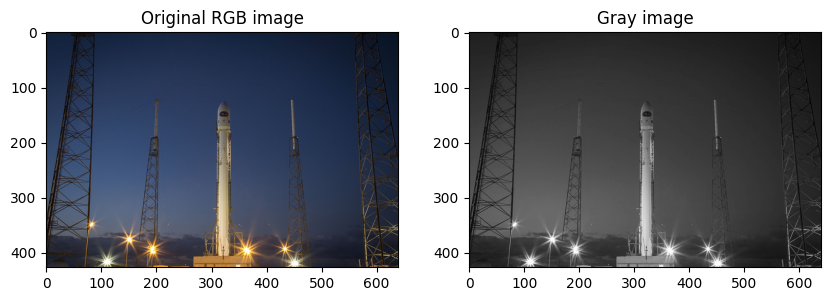

In [5]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original RGB image
ax[0].imshow(rocket)
ax[0].set_title('Original RGB image')

# Plot the grayscale image
ax[1].imshow(gray_scaled_rocket, cmap=plt.cm.gray)
ax[1].set_title('Gray image')

plt.show()

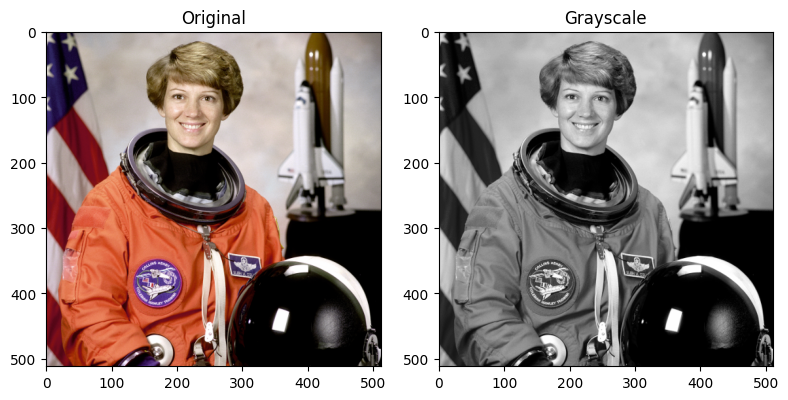

In [6]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

### Flip image

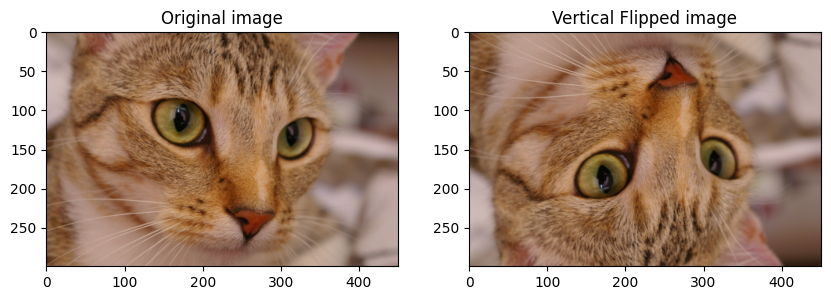

In [7]:
import numpy as np

cat = data.cat()

# Flip the image vertically (up direction)
cat_vertical_flip = np.flipud(cat)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the histograms for each channel
ax[0].imshow(cat)
ax[0].set_title('Original image')
ax[1].imshow(cat_vertical_flip)
ax[1].set_title('Vertical Flipped image')

# Show the plot
plt.show()

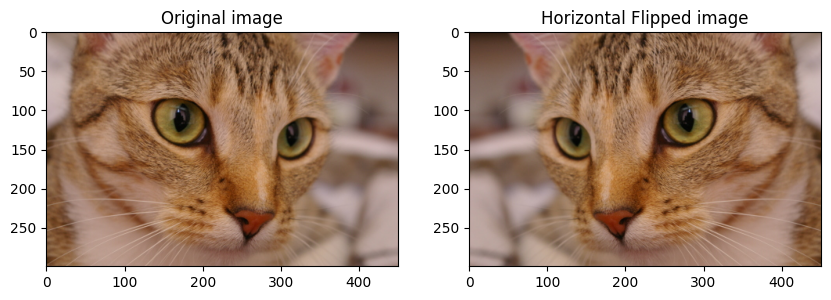

In [8]:
# Flip the image horizontally (left direction)
cat_horizontal_flip = np.fliplr(cat)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot the image
ax[0].imshow(cat)
ax[0].set_title('Original image')
ax[1].imshow(cat_horizontal_flip)
ax[1].set_title('Horizontal Flipped image')

plt.show()

In [9]:
cat.shape

(300, 451, 3)

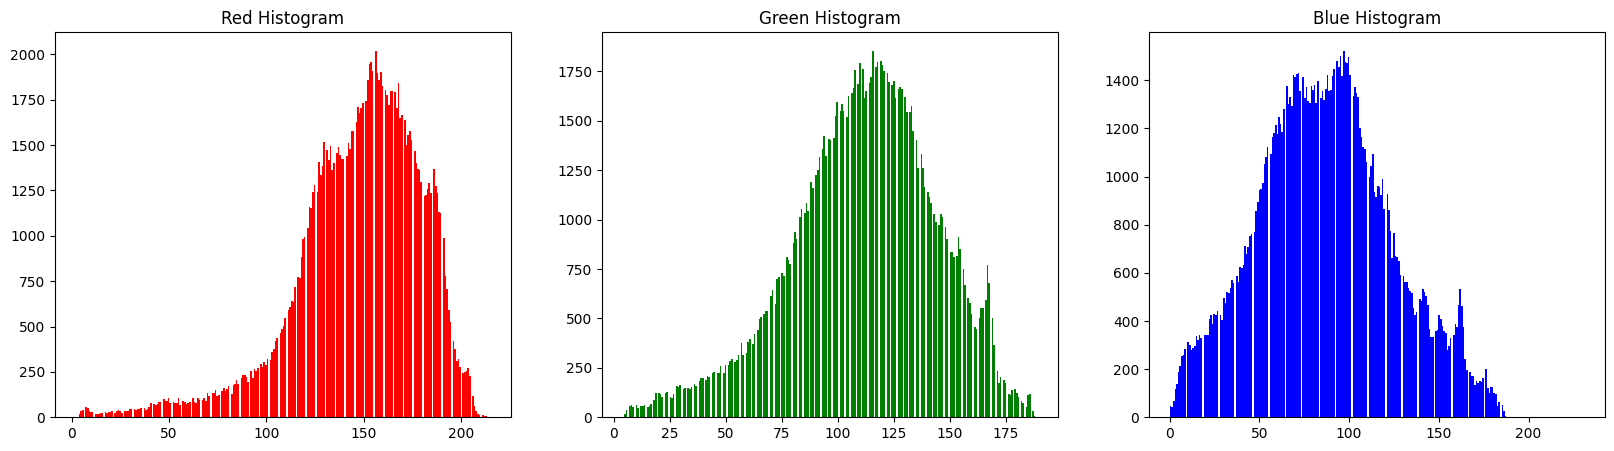

In [10]:
# Obtain the RGB channel
red_channel = cat[:, :, 0]
green_channel = cat[:, :, 1]
blue_channel = cat[:, :, 2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))

# Plot the histograms for each channel
ax1.hist(red_channel.ravel(), bins=256, color='red')
ax1.set_title('Red Histogram')

ax2.hist(green_channel.ravel(), bins=256, color='green')
ax2.set_title('Green Histogram')

ax3.hist(blue_channel.ravel(), bins=256, color='blue')
ax3.set_title('Blue Histogram')

# Show the plot
plt.show()

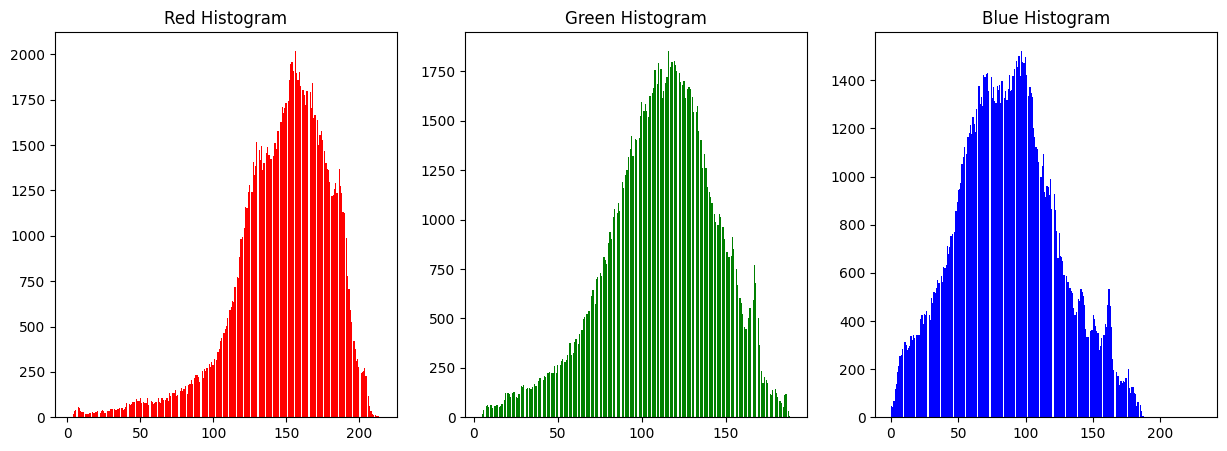

In [11]:
### Simplify the code abouve
# Create a list of channel names and corresponding colors
channels = [('Red', 'red'), ('Green', 'green'), ('Blue', 'blue')]

fig, axes = plt.subplots(1, len(channels), figsize=(15, 5))

# Iterate over each channel and plot its histogram
for i, (channel_name, color_name) in enumerate(channels):
    channel = cat[:, :, i]
    axes[i].hist(channel.ravel(), bins=256, color=color_name)
    axes[i].set_title(f'{channel_name} Histogram')

plt.show()

### Thresholding
- Partitioning an image into a foregraound and background
- By making it black and white
- Simplest method of image segmentation

### Global Thresholding

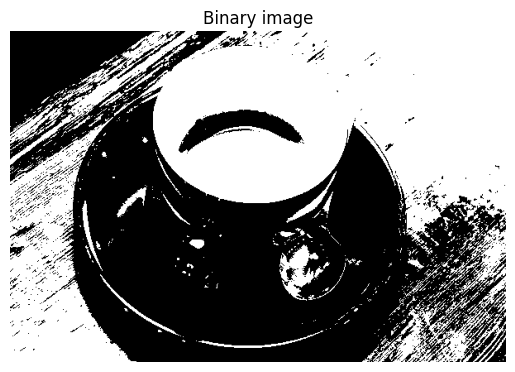

In [12]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
coffee = data.coffee()

# Make the image grayscale using rgb2gray
coffee_image_gray = rgb2gray(coffee)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(coffee_image_gray)

# Apply thresholding to the image
binary = coffee_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

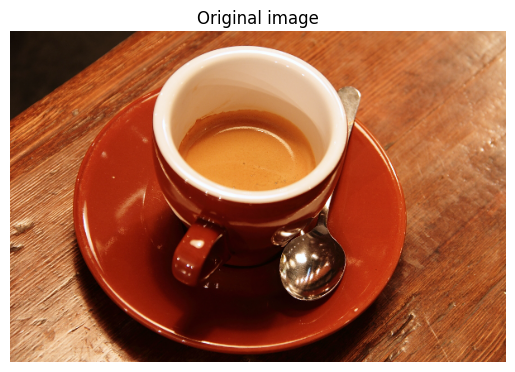

In [13]:
show_image(coffee, 'Original image')

### Local Thresholding
#### When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a `global threshold` value as we practiced before, using `threshold_otsu()`.<br> 
However, if there's `uneven background` illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

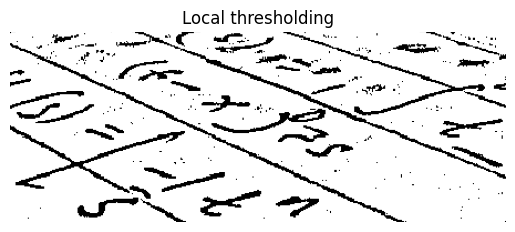

In [14]:
# Import the local threshold function
from skimage.filters import threshold_local

text_image = data.text()

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(text_image, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = text_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

### Compare to Global Thresholding

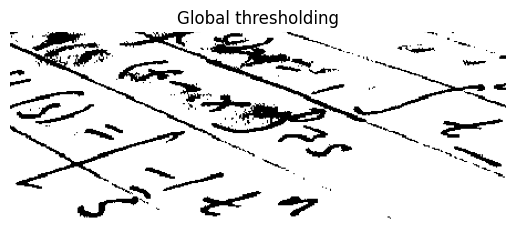

In [15]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu


# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(text_image)

# Apply thresholding to the image
binary = text_image > thresh

# Show the image
show_image(binary, 'Global thresholding')

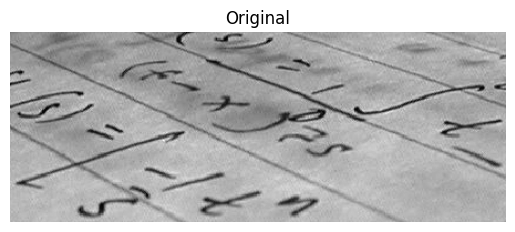

In [16]:
show_image(text_image, 'Original')

### Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.

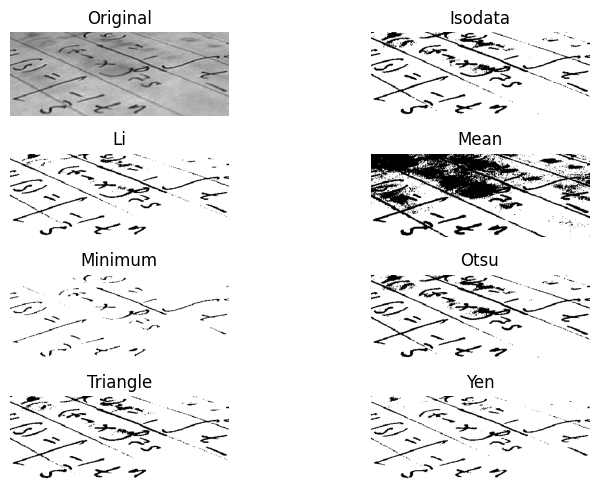

In [17]:
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray

# Turn the RGB_image to grayscale
#grayscale = rgb2gray(RGB_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(text_image, verbose=False)

# Show the resulting plots
plt.show()